In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('mean-air-temperature.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_wind_speed,mean_relative_humidity,percentage_possible_sunshine,total_sunshine_duration,solar_radiation,mean_air_temperature
0,Jan-10,75.5,5.5,75,14,40.4,8.1,-3.4
1,Feb-10,109.5,4.1,74,17,48.8,9.1,-4.9
2,Mar-10,100.5,4.7,68,29,108.0,12.2,-1.4
3,Apr-10,94.0,4.3,77,36,146.2,14.5,3.5
4,May-10,76.5,4.9,86,37,168.6,19.2,7.3


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.7245616521907664


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[-0.82686193  2.54578493  3.46427134 10.46330569 13.30219417 17.58186279
 15.98167082 15.98519495 17.82836605 10.72262973  0.86050163  2.06882647
  0.53697546 -1.53291732  5.83140884  5.82456125 10.58680912 11.95205874
 14.52907276 15.30580809 20.77912645  7.15791628  0.770452    4.50565959
 -0.34776075 -0.71397868  4.92788977 12.76621962 11.13644415 17.08580138
 14.93279922 15.22798113 13.88876311  4.73422115  1.79280176  0.82964068
 -0.1557652  -3.42778083 -1.79389284  8.21154761  5.37718787 14.32579744
 20.65597998 10.35014226 10.21805012  7.92796132  4.62239603 -2.30852712
 -0.13180356 -2.03835121  6.42009979  7.84038463  8.02522541 18.29703899
 14.56156224 25.96109335 17.29277221  2.48705385  2.97355966 -0.79284538
 -2.19536149 -1.85298401  6.95952457  5.50219055  8.71715588 13.26657867
 17.60686184 10.31823443 14.20354386  2.32371874 -0.83043806 -0.1712481
 -3.43954049 -2.17623071  1.95776715  6.38704693 12.81789743 17.31179235
 20.24348238 14.77787333 21.904

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 3.7513759423254234
Mean Squared Error: 20.36919833463192
Root Mean Squared Error: 4.513224826510632


Text(0.5, 1.0, 'Mean air temperature - actual and predicted values')

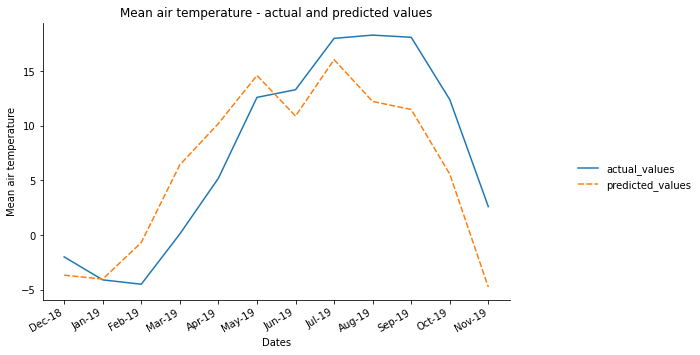

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Mean air temperature') #set the label for the y-axis
plt.title('Mean air temperature - actual and predicted values') #set the title of the graph